In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
raw_df = pd.read_csv('housing.csv', header=None, names=["values"])

raw_df.head()

,values
0,0.00632 18.00 2.310 0 0.5380 6.5750 65...
1,0.02731 0.00 7.070 0 0.4690 6.4210 78...
2,0.02729 0.00 7.070 0 0.4690 7.1850 61...
3,0.03237 0.00 2.180 0 0.4580 6.9980 45...
4,0.06905 0.00 2.180 0 0.4580 7.1470 54...


In [ ]:
def convertStr(s):
  st = s.strip()
  new_str = ''

  for ch in st:
    if ch == ' ':
      if new_str[-1] != ' ' and new_str[-1] != ';': new_str += ';'
    else:
      new_str += ch
  return new_str



In [ ]:
raw_df["values"] = raw_df['values'].apply(convertStr)
raw_df.head()

,values
0,0.00632;18.00;2.310;0;0.5380;6.5750;65.20;4.09...
1,0.02731;0.00;7.070;0;0.4690;6.4210;78.90;4.967...
2,0.02729;0.00;7.070;0;0.4690;7.1850;61.10;4.967...
3,0.03237;0.00;2.180;0;0.4580;6.9980;45.80;6.062...
4,0.06905;0.00;2.180;0;0.4580;7.1470;54.20;6.062...


In [ ]:
df = raw_df['values'].str.split(';', expand=True)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
1,0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60
2,0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70
3,0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40
4,0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20


In [ ]:
data = df.values.astype(np.float32)
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]], dtype=float32)

In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[:, :-1])

In [ ]:
features = torch.from_numpy(data_scaled)
features

tensor([[0.0000e+00, 1.8000e-01, 6.7815e-02,  ..., 2.8723e-01, 1.0000e+00,
         8.9680e-02],
        [2.3592e-04, 0.0000e+00, 2.4230e-01,  ..., 5.5319e-01, 1.0000e+00,
         2.0447e-01],
        [2.3570e-04, 0.0000e+00, 2.4230e-01,  ..., 5.5319e-01, 9.8974e-01,
         6.3466e-02],
        ...,
        [6.1189e-04, 0.0000e+00, 4.2045e-01,  ..., 8.9362e-01, 1.0000e+00,
         1.0789e-01],
        [1.1607e-03, 0.0000e+00, 4.2045e-01,  ..., 8.9362e-01, 9.9130e-01,
         1.3107e-01],
        [4.6184e-04, 0.0000e+00, 4.2045e-01,  ..., 8.9362e-01, 1.0000e+00,
         1.6970e-01]])

In [ ]:
num_inputs = features.shape[1]

true_w = torch.randn(num_inputs)
true_b = 0.0
labels = torch.from_numpy(data[:, -1])

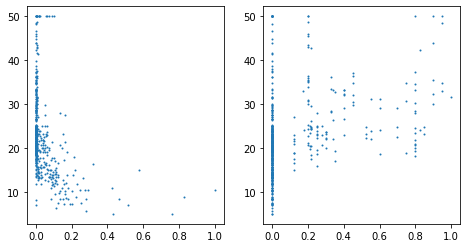

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(features[:, 0], labels, 1)
plt.subplot(132)
plt.scatter(features[:, 1], labels, 1)
plt.show()

In [ ]:
batch_size = 10
dataset = TensorDataset(features, labels)
# Randomly reading mini-batches
data_iter = DataLoader(dataset, batch_size, shuffle=True)

In [ ]:
model = torch.nn.Sequential(torch.nn.Linear(num_inputs, 1))

model[0].weight.data = true_w.clone().detach().requires_grad_(True).reshape((1, num_inputs))
model[0].bias.data = torch.tensor([true_b], requires_grad = True)

loss = torch.nn.MSELoss(reduction='mean')

trainer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
num_epochs = 200
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        trainer.zero_grad()
        l = loss(model(X).reshape(-1), y)
        l.backward()
        trainer.step()
    l = loss(model(features).reshape(-1), labels)
    if epoch < 5 or epoch % 5 == 0:
      print('epoch %d, loss: %f' % (epoch, l.item()),'|\tw', model[0].weight.data, '|\tb', model[0].bias.data)

epoch 1, loss: 93.407593 |	w tensor([[1.8202, 2.2303, 2.2666, 1.6517, 0.9084, 3.0923, 2.8179, 1.3690, 1.0584,
         0.6064, 3.0070, 7.7693, 0.1050]]) |	b tensor([5.9778])
epoch 2, loss: 73.378593 |	w tensor([[ 1.5206,  3.0679,  1.5212,  1.9852,  0.3267,  4.4473,  2.4217,  2.0512,
          0.0659, -0.3834,  2.4768,  9.0547, -0.8936]]) |	b tensor([6.9989])
epoch 3, loss: 62.931942 |	w tensor([[ 1.2937,  3.6612,  0.8601,  2.2702, -0.1684,  5.4105,  1.9372,  2.3958,
         -0.6381, -1.1750,  1.7911,  9.6271, -1.8328]]) |	b tensor([7.4598])
epoch 4, loss: 56.851040 |	w tensor([[ 1.1345,  4.1169,  0.5378,  2.5383, -0.3556,  6.4626,  1.8962,  2.6637,
         -0.9057, -1.5509,  1.4469, 10.3520, -2.5143]]) |	b tensor([8.2285])
epoch 5, loss: 52.402905 |	w tensor([[ 0.9944,  4.4132,  0.1573,  2.7650, -0.5957,  7.1971,  1.6229,  2.7167,
         -1.1576, -1.9600,  0.8786, 10.5363, -3.2476]]) |	b tensor([8.4828])
epoch 10, loss: 42.734161 |	w tensor([[ 0.5972,  5.0674, -0.6233,  3.5770, -0.

**Проверка модели**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42, shuffle=False)

In [ ]:
pred = model(X_test).data.numpy()  # Предсказанные значения

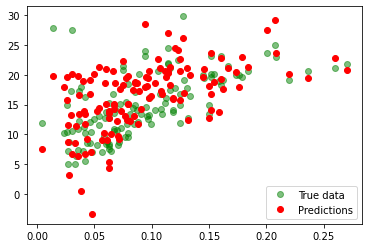

In [ ]:
plt.clf()
plt.plot(X_test[:, 7], y_test, 'go', label='True data', alpha=0.5)
plt.plot(X_test[:, 7], pred, 'go', label='Predictions', color='red')
plt.legend(loc='best')
plt.show()